In [1]:
from pycaret.regression import *

Matplotlib is building the font cache; this may take a moment.


In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('C:/Users/user/Downloads/weather_data/Mount_Wash.csv')

In [5]:
reg = setup (data=data, target='T2M', session_id=123)

,Description,Value
0,Session id,123
1,Target,T2M
2,Target type,Regression
3,Original data shape,"(15555, 18)"
4,Transformed data shape,"(15555, 18)"
5,Transformed train set shape,"(10888, 18)"
6,Transformed test set shape,"(4667, 18)"
7,Numeric features,17
8,Preprocess,True
9,Imputation type,simple


In [6]:
best=compare_models(exclude=['ransac'],sort='MSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.1540,0.0598,0.2044,0.6995,0.0425,0.0748,4.7800
et,Extra Trees Regressor,0.2503,0.1144,0.3380,0.9991,0.0673,0.1085,3.7310
xgboost,Extreme Gradient Boosting,0.2569,0.1178,0.3431,0.9990,0.0732,0.1272,1.6880
lightgbm,Light Gradient Boosting Machine,0.2665,0.1262,0.3550,0.9990,0.0733,0.1222,0.5130
rf,Random Forest Regressor,0.3044,0.1756,0.4187,0.9986,0.0812,0.1336,10.9990
gbr,Gradient Boosting Regressor,0.3774,0.2451,0.4949,0.9980,0.0987,0.1640,3.0860
dt,Decision Tree Regressor,0.4802,0.4287,0.6544,0.9965,0.1228,0.2113,0.2360
ridge,Ridge Regression,0.5169,0.4731,0.6877,0.9962,0.1319,0.2376,0.0460
br,Bayesian Ridge,0.5168,0.4731,0.6877,0.9962,0.1319,0.2376,0.0520
lr,Linear Regression,0.5171,0.4732,0.6877,0.9962,0.1320,0.2377,1.3060


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [7]:
create_cb= create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2253,0.0942,0.3068,0.9992,0.0617,0.0954
1,0.2162,0.0882,0.2970,0.9993,0.0587,0.0863
2,0.2116,0.0788,0.2806,0.9994,0.0641,0.0809
3,0.2116,0.0819,0.2861,0.9993,0.0514,0.0635
4,0.2178,0.0844,0.2905,0.9993,0.0599,0.1391
5,0.2104,0.0787,0.2805,0.9994,0.0542,0.1244
6,0.2210,0.0865,0.2942,0.9993,0.0611,0.0982
7,0.2310,0.0891,0.2985,0.9993,0.0630,0.0814
8,0.2100,0.0743,0.2726,0.9994,0.0587,0.1071


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [8]:
tuned_cb = tune_model(create_cb)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2530,0.1323,0.3637,0.9989,0.0653,0.1178
1,0.2316,0.0966,0.3108,0.9993,0.0613,0.1104
2,0.2334,0.0997,0.3157,0.9992,0.0693,0.0879
3,0.2278,0.0948,0.3080,0.9992,0.0533,0.0639
4,0.2421,0.1226,0.3501,0.9990,0.0676,0.1447
5,0.2628,0.1283,0.3582,0.9990,0.0701,0.1662
6,0.2473,0.1063,0.3261,0.9991,0.0656,0.1220
7,0.2506,0.1226,0.3502,0.9990,0.0707,0.1036
8,0.2442,0.1152,0.3393,0.9990,0.0638,0.1084


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


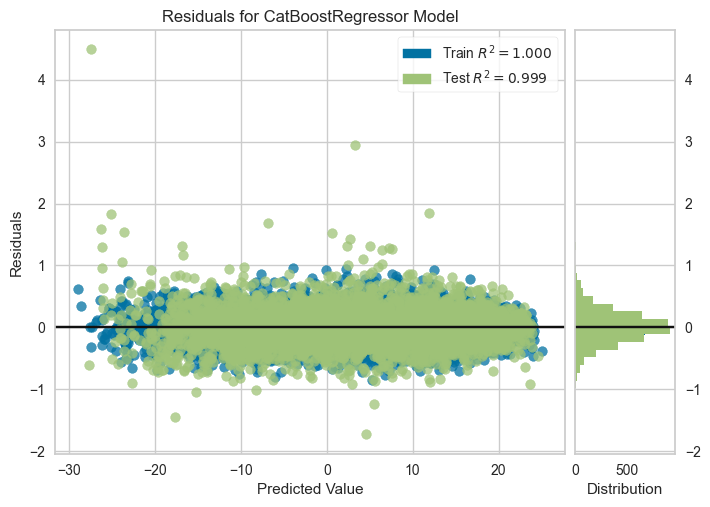

In [9]:
plot_model(tuned_cb)

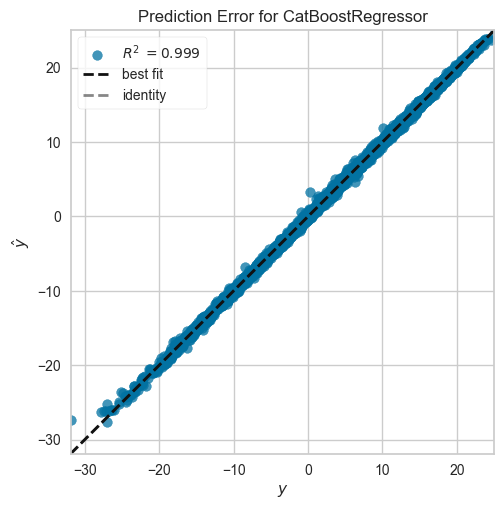

In [10]:
plot_model(tuned_cb, plot = 'error')


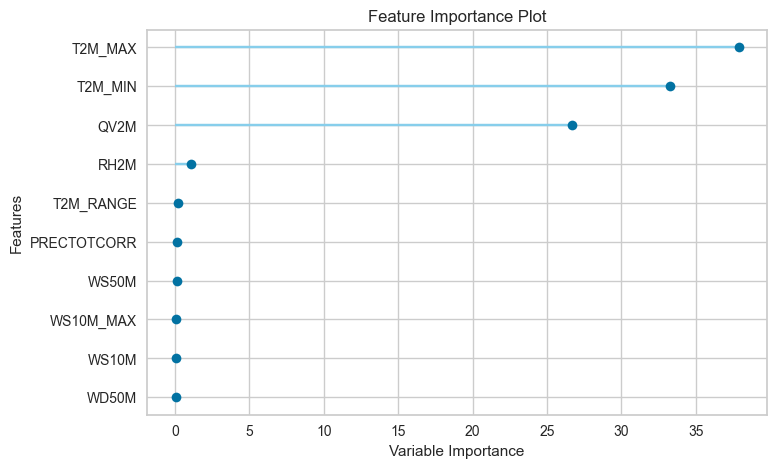

In [11]:
plot_model(tuned_cb, plot = 'feature')


In [12]:
evaluate_model(tuned_cb)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [13]:
evaluate_model(tuned_cb)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [14]:
predict_model(tuned_cb)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.2137,0.0869,0.2947,0.9993,0.0625,0.1205


,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,T2M_RANGE,T2M_MAX,T2M_MIN,T2M,prediction_label
5814,1.77,95.559998,1.58,94.839996,1.38,2.32,0.41,1.91,247.500000,2.48,4.57,0.54,4.03,248.059998,7.84,-6.070000,-13.92,-9.520000,-9.633013
13655,7.51,72.750000,0.00,96.019997,1.31,1.78,0.80,0.98,141.559998,3.11,4.77,1.42,3.35,143.500000,15.52,21.059999,5.55,14.440000,14.277601
8250,10.19,95.620003,18.23,95.370003,1.20,2.33,0.45,1.88,186.880005,2.80,4.59,0.77,3.82,189.059998,6.68,18.129999,11.45,14.110000,14.394750
2985,5.74,89.250000,9.11,95.529999,1.52,2.09,0.42,1.66,199.119995,2.98,5.15,0.67,4.48,199.690002,10.26,12.310000,2.05,6.520000,6.554931
5131,2.99,99.190002,0.01,96.129997,2.56,3.36,1.85,1.50,220.559998,4.66,5.48,3.85,1.62,221.880005,7.57,0.050000,-7.52,-3.560000,-3.499762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,11.84,97.120003,8.75,95.089996,1.46,1.99,0.62,1.37,196.059998,3.36,4.91,1.66,3.25,197.940002,5.59,18.830000,13.25,16.209999,16.037190
11528,11.60,85.250000,0.90,96.870003,1.35,1.56,1.06,0.50,157.500000,3.08,4.21,1.84,2.37,160.250000,11.67,24.209999,12.55,18.480000,18.472408
9234,6.77,94.690002,4.94,96.110001,2.72,3.23,2.02,1.22,97.750000,4.90,5.72,3.73,1.99,99.120003,5.00,10.800000,5.80,8.350000,8.120920
4670,5.86,98.190002,5.84,95.339996,2.12,3.77,0.91,2.88,195.440002,4.05,7.18,1.27,5.91,197.309998,9.58,11.500000,1.92,5.460000,6.031145


In [15]:
final_cb = finalize_model(tuned_cb)
print(final_cb)

Pipeline(memory=FastMemory(location=C:\Users\user\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['QV2M', 'RH2M', 'PRECTOTCORR',
                                             'PS', 'WS10M', 'WS10M_MAX',
                                             'WS10M_MIN', 'WS10M_RANGE',
                                             'WD10M', 'WS50M', 'WS50M_MAX',
                                             'WS50M_MIN', 'WS50M_RANGE',
                                             'WD50M', 'T2M_RANGE', 'T2M_MAX',
                                             'T2M_MIN'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x0000021829DC4040>)])


In [16]:
predict_model(final_cb)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.1624,0.0442,0.2102,0.9996,0.0477,0.0976


,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,T2M_RANGE,T2M_MAX,T2M_MIN,T2M,prediction_label
5814,1.77,95.559998,1.58,94.839996,1.38,2.32,0.41,1.91,247.500000,2.48,4.57,0.54,4.03,248.059998,7.84,-6.070000,-13.92,-9.520000,-9.650540
13655,7.51,72.750000,0.00,96.019997,1.31,1.78,0.80,0.98,141.559998,3.11,4.77,1.42,3.35,143.500000,15.52,21.059999,5.55,14.440000,14.211569
8250,10.19,95.620003,18.23,95.370003,1.20,2.33,0.45,1.88,186.880005,2.80,4.59,0.77,3.82,189.059998,6.68,18.129999,11.45,14.110000,14.526385
2985,5.74,89.250000,9.11,95.529999,1.52,2.09,0.42,1.66,199.119995,2.98,5.15,0.67,4.48,199.690002,10.26,12.310000,2.05,6.520000,6.626703
5131,2.99,99.190002,0.01,96.129997,2.56,3.36,1.85,1.50,220.559998,4.66,5.48,3.85,1.62,221.880005,7.57,0.050000,-7.52,-3.560000,-3.553809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,11.84,97.120003,8.75,95.089996,1.46,1.99,0.62,1.37,196.059998,3.36,4.91,1.66,3.25,197.940002,5.59,18.830000,13.25,16.209999,16.076134
11528,11.60,85.250000,0.90,96.870003,1.35,1.56,1.06,0.50,157.500000,3.08,4.21,1.84,2.37,160.250000,11.67,24.209999,12.55,18.480000,18.283518
9234,6.77,94.690002,4.94,96.110001,2.72,3.23,2.02,1.22,97.750000,4.90,5.72,3.73,1.99,99.120003,5.00,10.800000,5.80,8.350000,8.139121
4670,5.86,98.190002,5.84,95.339996,2.12,3.77,0.91,2.88,195.440002,4.05,7.18,1.27,5.91,197.309998,9.58,11.500000,1.92,5.460000,5.782241


In [17]:
unseen_predictions = predict_model(final_cb, data=data)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.1631,0.0439,0.2094,0.9996,0.0468,0.0825


,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,T2M_RANGE,T2M_MAX,T2M_MIN,T2M,prediction_label
0,1.95,84.559998,5.15,96.099998,3.66,5.33,1.73,3.59,204.190002,6.18,9.23,2.56,6.66,206.559998,14.43,-2.28,-16.700001,-7.83,-7.992031
1,4.33,96.190002,30.43,94.220001,5.84,7.44,3.92,3.52,206.119995,10.33,13.52,7.40,6.12,208.809998,12.48,6.48,-6.000000,1.03,0.881216
2,1.10,72.190002,0.11,95.080002,4.34,5.11,3.39,1.72,274.690002,7.12,8.35,5.74,2.61,274.119995,8.64,-6.78,-15.430000,-11.39,-11.191031
3,0.85,79.120003,0.15,95.540001,1.92,3.30,1.04,2.26,248.440002,3.33,5.51,2.18,3.34,249.059998,3.28,-12.96,-16.240000,-14.94,-14.705139
4,0.79,81.879997,0.16,96.050003,2.56,3.90,1.04,2.86,277.309998,4.46,6.23,2.22,4.01,277.809998,5.66,-13.97,-19.629999,-16.43,-16.477809


In [18]:
save_model(final_cb,'Final CB Model 16Sep2023')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\user\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['QV2M', 'RH2M', 'PRECTOTCORR',
                                              'PS', 'WS10M', 'WS10M_MAX',
                                              'WS10M_MIN', 'WS10M_RANGE',
                                              'WD10M', 'WS50M', 'WS50M_MAX',
                                              'WS50M_MIN', 'WS50M_RANGE',
                                              'WD50M', 'T2M_RANGE', 'T2M_MAX',
                                              'T2M_MIN'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  <catboost.core.CatBoostRegressor object at 0x0000021829DC4040>)

In [19]:
create_et= create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2591,0.1212,0.3481,0.9990,0.0739,0.1086
1,0.2435,0.1083,0.3291,0.9992,0.0660,0.0862
2,0.2413,0.1033,0.3215,0.9992,0.0742,0.1148
3,0.2566,0.1257,0.3546,0.9990,0.0624,0.0716
4,0.2497,0.1156,0.3401,0.9991,0.0634,0.1337
5,0.2532,0.1176,0.3429,0.9991,0.0652,0.1577
6,0.2489,0.1108,0.3329,0.9991,0.0604,0.1185
7,0.2572,0.1179,0.3434,0.9991,0.0716,0.0874
8,0.2559,0.1176,0.3430,0.9990,0.0676,0.1042


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [21]:
tuned_et = tune_model(create_et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5319,0.4850,0.6964,0.9961,0.1204,0.1941
1,0.5292,0.5271,0.7260,0.9960,0.1061,0.1544
2,0.5260,0.5185,0.7201,0.9958,0.1171,0.2219
3,0.5243,0.4873,0.6981,0.9960,0.1038,0.1374
4,0.5227,0.5185,0.7201,0.9958,0.1056,0.2374
5,0.5171,0.5168,0.7189,0.9960,0.1030,0.2478
6,0.5207,0.5000,0.7071,0.9958,0.1107,0.1882
7,0.4924,0.4502,0.6710,0.9964,0.1058,0.1426
8,0.5389,0.5364,0.7324,0.9955,0.1147,0.2009


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


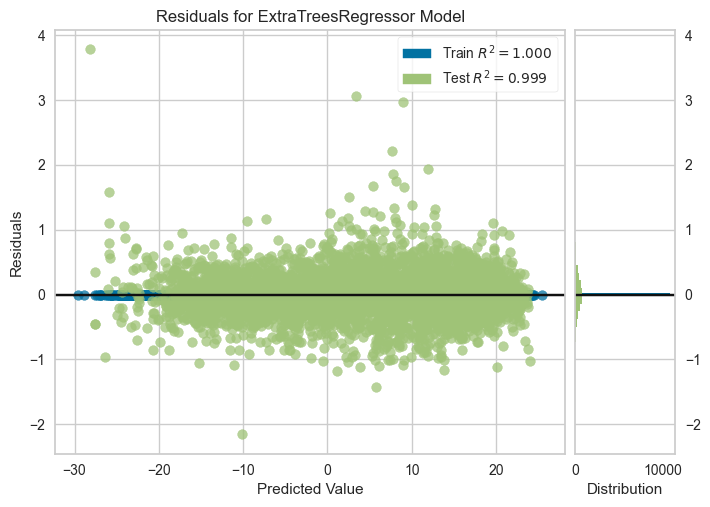

In [22]:
plot_model(tuned_et) 

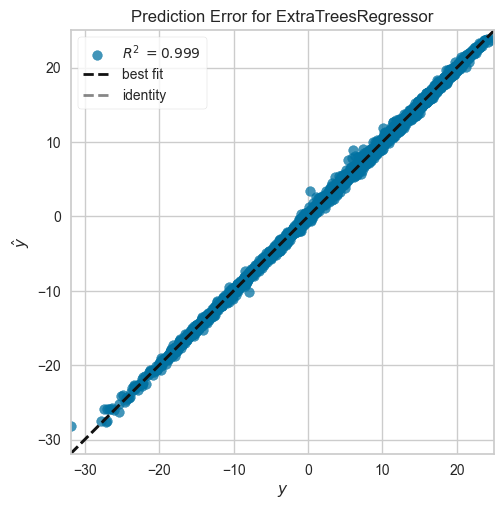

In [24]:
plot_model(tuned_et, plot = 'error')

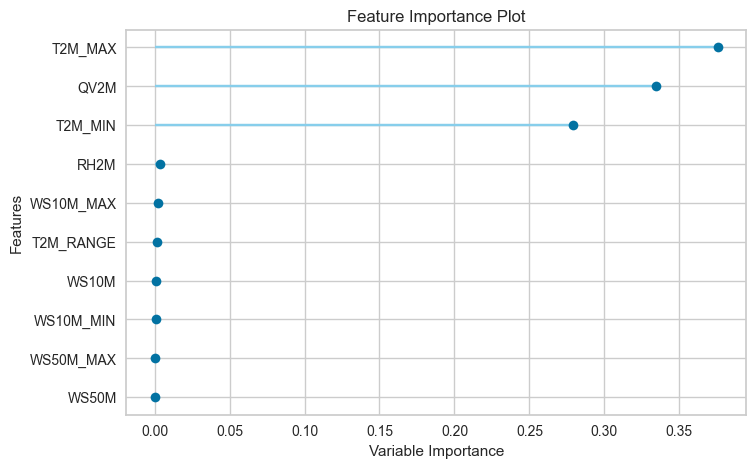

In [25]:
plot_model(tuned_et, plot = 'feature')

In [26]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [27]:
predict_model(tuned_et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.2447,0.1140,0.3377,0.9991,0.0687,0.1257


,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,T2M_RANGE,T2M_MAX,T2M_MIN,T2M,prediction_label
5814,1.77,95.559998,1.58,94.839996,1.38,2.32,0.41,1.91,247.500000,2.48,4.57,0.54,4.03,248.059998,7.84,-6.070000,-13.92,-9.520000,-9.6138
13655,7.51,72.750000,0.00,96.019997,1.31,1.78,0.80,0.98,141.559998,3.11,4.77,1.42,3.35,143.500000,15.52,21.059999,5.55,14.440000,13.7615
8250,10.19,95.620003,18.23,95.370003,1.20,2.33,0.45,1.88,186.880005,2.80,4.59,0.77,3.82,189.059998,6.68,18.129999,11.45,14.110000,14.5184
2985,5.74,89.250000,9.11,95.529999,1.52,2.09,0.42,1.66,199.119995,2.98,5.15,0.67,4.48,199.690002,10.26,12.310000,2.05,6.520000,6.8720
5131,2.99,99.190002,0.01,96.129997,2.56,3.36,1.85,1.50,220.559998,4.66,5.48,3.85,1.62,221.880005,7.57,0.050000,-7.52,-3.560000,-3.4305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,11.84,97.120003,8.75,95.089996,1.46,1.99,0.62,1.37,196.059998,3.36,4.91,1.66,3.25,197.940002,5.59,18.830000,13.25,16.209999,16.1044
11528,11.60,85.250000,0.90,96.870003,1.35,1.56,1.06,0.50,157.500000,3.08,4.21,1.84,2.37,160.250000,11.67,24.209999,12.55,18.480000,18.3337
9234,6.77,94.690002,4.94,96.110001,2.72,3.23,2.02,1.22,97.750000,4.90,5.72,3.73,1.99,99.120003,5.00,10.800000,5.80,8.350000,8.2764
4670,5.86,98.190002,5.84,95.339996,2.12,3.77,0.91,2.88,195.440002,4.05,7.18,1.27,5.91,197.309998,9.58,11.500000,1.92,5.460000,5.9318


In [29]:
final_et = finalize_model(tuned_et)
print(final_et)

Pipeline(memory=FastMemory(location=C:\Users\user\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['QV2M', 'RH2M', 'PRECTOTCORR',
                                             'PS', 'WS10M', 'WS10M_MAX',
                                             'WS10M_MIN', 'WS10M_RANGE',
                                             'WD10M', 'WS50M', 'WS50M_MAX',
                                             'WS50M_MIN', 'WS50M_RANGE',
                                             'WD50M', 'T2M_RANGE', 'T2M_MAX',
                                             'T2M_MIN'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('actual_estimator',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])


In [30]:
predict_model(final_et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,T2M_RANGE,T2M_MAX,T2M_MIN,T2M,prediction_label
5814,1.77,95.559998,1.58,94.839996,1.38,2.32,0.41,1.91,247.500000,2.48,4.57,0.54,4.03,248.059998,7.84,-6.070000,-13.92,-9.520000,-9.520000
13655,7.51,72.750000,0.00,96.019997,1.31,1.78,0.80,0.98,141.559998,3.11,4.77,1.42,3.35,143.500000,15.52,21.059999,5.55,14.440000,14.440000
8250,10.19,95.620003,18.23,95.370003,1.20,2.33,0.45,1.88,186.880005,2.80,4.59,0.77,3.82,189.059998,6.68,18.129999,11.45,14.110000,14.110000
2985,5.74,89.250000,9.11,95.529999,1.52,2.09,0.42,1.66,199.119995,2.98,5.15,0.67,4.48,199.690002,10.26,12.310000,2.05,6.520000,6.520000
5131,2.99,99.190002,0.01,96.129997,2.56,3.36,1.85,1.50,220.559998,4.66,5.48,3.85,1.62,221.880005,7.57,0.050000,-7.52,-3.560000,-3.560000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,11.84,97.120003,8.75,95.089996,1.46,1.99,0.62,1.37,196.059998,3.36,4.91,1.66,3.25,197.940002,5.59,18.830000,13.25,16.209999,16.209999
11528,11.60,85.250000,0.90,96.870003,1.35,1.56,1.06,0.50,157.500000,3.08,4.21,1.84,2.37,160.250000,11.67,24.209999,12.55,18.480000,18.480000
9234,6.77,94.690002,4.94,96.110001,2.72,3.23,2.02,1.22,97.750000,4.90,5.72,3.73,1.99,99.120003,5.00,10.800000,5.80,8.350000,8.350000
4670,5.86,98.190002,5.84,95.339996,2.12,3.77,0.91,2.88,195.440002,4.05,7.18,1.27,5.91,197.309998,9.58,11.500000,1.92,5.460000,5.460000


In [31]:
unseen_predictions = predict_model(final_et, data=data)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,T2M_RANGE,T2M_MAX,T2M_MIN,T2M,prediction_label
0,1.95,84.559998,5.15,96.099998,3.66,5.33,1.73,3.59,204.190002,6.18,9.23,2.56,6.66,206.559998,14.43,-2.28,-16.700001,-7.83,-7.83
1,4.33,96.190002,30.43,94.220001,5.84,7.44,3.92,3.52,206.119995,10.33,13.52,7.40,6.12,208.809998,12.48,6.48,-6.000000,1.03,1.03
2,1.10,72.190002,0.11,95.080002,4.34,5.11,3.39,1.72,274.690002,7.12,8.35,5.74,2.61,274.119995,8.64,-6.78,-15.430000,-11.39,-11.39
3,0.85,79.120003,0.15,95.540001,1.92,3.30,1.04,2.26,248.440002,3.33,5.51,2.18,3.34,249.059998,3.28,-12.96,-16.240000,-14.94,-14.94
4,0.79,81.879997,0.16,96.050003,2.56,3.90,1.04,2.86,277.309998,4.46,6.23,2.22,4.01,277.809998,5.66,-13.97,-19.629999,-16.43,-16.43


In [32]:
save_model(final_et,'Final ET Model 16Sep2023')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\user\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['QV2M', 'RH2M', 'PRECTOTCORR',
                                              'PS', 'WS10M', 'WS10M_MAX',
                                              'WS10M_MIN', 'WS10M_RANGE',
                                              'WD10M', 'WS50M', 'WS50M_MAX',
                                              'WS50M_MIN', 'WS50M_RANGE',
                                              'WD50M', 'T2M_RANGE', 'T2M_MAX',
                                              'T2M_MIN'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  ExtraTreesRegressor(n_jobs=-1, random_state=123))]),
 'Final ET

In [33]:
create_xgboost= create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2619,0.1254,0.3541,0.9990,0.0767,0.1381
1,0.2498,0.1093,0.3305,0.9992,0.0681,0.0969
2,0.2486,0.1071,0.3273,0.9991,0.0762,0.0993
3,0.2587,0.1186,0.3444,0.9990,0.0647,0.0856
4,0.2634,0.1233,0.3512,0.9990,0.0699,0.1268
5,0.2615,0.1284,0.3583,0.9990,0.0762,0.2511
6,0.2587,0.1178,0.3432,0.9990,0.0723,0.1227
7,0.2567,0.1199,0.3463,0.9990,0.0767,0.1025
8,0.2609,0.1161,0.3407,0.9990,0.0755,0.1225


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [34]:
tuned_xgboost = tune_model(create_xgboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2289,0.0991,0.3149,0.9992,0.0688,0.1108
1,0.2133,0.0781,0.2795,0.9994,0.0558,0.0875
2,0.2125,0.0767,0.2769,0.9994,0.0615,0.1072
3,0.2261,0.0925,0.3042,0.9992,0.0555,0.0557
4,0.2217,0.0885,0.2975,0.9993,0.0579,0.1150
5,0.2248,0.0905,0.3009,0.9993,0.0628,0.1516
6,0.2292,0.0943,0.3070,0.9992,0.0643,0.1288
7,0.2233,0.0848,0.2911,0.9993,0.0645,0.0844
8,0.2138,0.0793,0.2817,0.9993,0.0583,0.0889


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


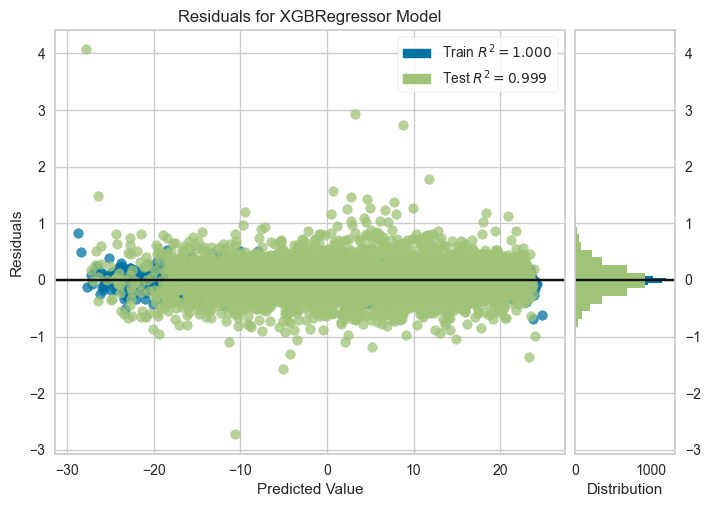

In [35]:
plot_model(tuned_xgboost) 

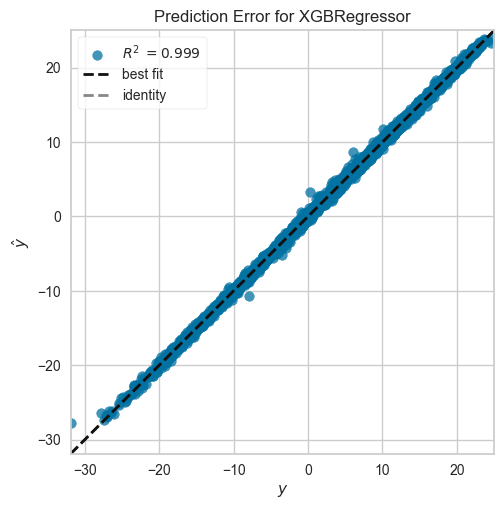

In [36]:
plot_model(tuned_xgboost, plot = 'error')

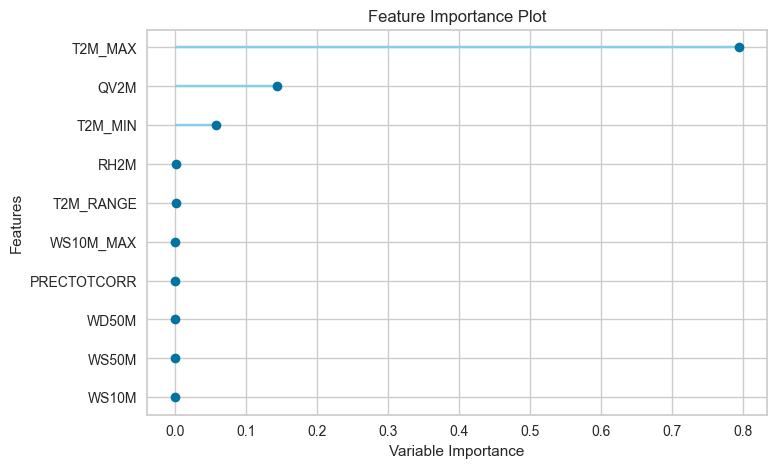

In [37]:
plot_model(tuned_xgboost, plot = 'feature')

In [38]:
evaluate_model(tuned_xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [39]:
predict_model(tuned_xgboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,0.2294,0.0989,0.3145,0.9992,0.0676,0.1343


,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,T2M_RANGE,T2M_MAX,T2M_MIN,T2M,prediction_label
5814,1.77,95.559998,1.58,94.839996,1.38,2.32,0.41,1.91,247.500000,2.48,4.57,0.54,4.03,248.059998,7.84,-6.070000,-13.92,-9.520000,-9.665960
13655,7.51,72.750000,0.00,96.019997,1.31,1.78,0.80,0.98,141.559998,3.11,4.77,1.42,3.35,143.500000,15.52,21.059999,5.55,14.440000,13.831555
8250,10.19,95.620003,18.23,95.370003,1.20,2.33,0.45,1.88,186.880005,2.80,4.59,0.77,3.82,189.059998,6.68,18.129999,11.45,14.110000,14.348511
2985,5.74,89.250000,9.11,95.529999,1.52,2.09,0.42,1.66,199.119995,2.98,5.15,0.67,4.48,199.690002,10.26,12.310000,2.05,6.520000,6.420969
5131,2.99,99.190002,0.01,96.129997,2.56,3.36,1.85,1.50,220.559998,4.66,5.48,3.85,1.62,221.880005,7.57,0.050000,-7.52,-3.560000,-3.475708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,11.84,97.120003,8.75,95.089996,1.46,1.99,0.62,1.37,196.059998,3.36,4.91,1.66,3.25,197.940002,5.59,18.830000,13.25,16.209999,16.278847
11528,11.60,85.250000,0.90,96.870003,1.35,1.56,1.06,0.50,157.500000,3.08,4.21,1.84,2.37,160.250000,11.67,24.209999,12.55,18.480000,18.228983
9234,6.77,94.690002,4.94,96.110001,2.72,3.23,2.02,1.22,97.750000,4.90,5.72,3.73,1.99,99.120003,5.00,10.800000,5.80,8.350000,8.286841
4670,5.86,98.190002,5.84,95.339996,2.12,3.77,0.91,2.88,195.440002,4.05,7.18,1.27,5.91,197.309998,9.58,11.500000,1.92,5.460000,5.595273


In [40]:
final_xgboost = finalize_model(tuned_xgboost)
print(final_xgboost)

Pipeline(memory=FastMemory(location=C:\Users\user\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['QV2M', 'RH2M', 'PRECTOTCORR',
                                             'PS', 'WS10M', 'WS10M_MAX',
                                             'WS10M_MIN', 'WS10M_RANGE',
                                             'WD10M', 'WS50M', 'WS50M_MAX',
                                             'WS50M_MIN', 'WS50M_RANGE',
                                             'WD50M', 'T2M_RANGE', 'T2M_MAX',
                                             'T2M_MIN'],
                                    transformer=SimpleImputer())),
                ('categorical...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.15,
                              max_bin=None, max_cat_t

In [41]:
predict_model(final_xgboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,0.0967,0.0163,0.1277,0.9999,0.0305,0.0619


,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,T2M_RANGE,T2M_MAX,T2M_MIN,T2M,prediction_label
5814,1.77,95.559998,1.58,94.839996,1.38,2.32,0.41,1.91,247.500000,2.48,4.57,0.54,4.03,248.059998,7.84,-6.070000,-13.92,-9.520000,-9.521748
13655,7.51,72.750000,0.00,96.019997,1.31,1.78,0.80,0.98,141.559998,3.11,4.77,1.42,3.35,143.500000,15.52,21.059999,5.55,14.440000,14.172017
8250,10.19,95.620003,18.23,95.370003,1.20,2.33,0.45,1.88,186.880005,2.80,4.59,0.77,3.82,189.059998,6.68,18.129999,11.45,14.110000,14.139915
2985,5.74,89.250000,9.11,95.529999,1.52,2.09,0.42,1.66,199.119995,2.98,5.15,0.67,4.48,199.690002,10.26,12.310000,2.05,6.520000,6.619126
5131,2.99,99.190002,0.01,96.129997,2.56,3.36,1.85,1.50,220.559998,4.66,5.48,3.85,1.62,221.880005,7.57,0.050000,-7.52,-3.560000,-3.572686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,11.84,97.120003,8.75,95.089996,1.46,1.99,0.62,1.37,196.059998,3.36,4.91,1.66,3.25,197.940002,5.59,18.830000,13.25,16.209999,16.193361
11528,11.60,85.250000,0.90,96.870003,1.35,1.56,1.06,0.50,157.500000,3.08,4.21,1.84,2.37,160.250000,11.67,24.209999,12.55,18.480000,18.437313
9234,6.77,94.690002,4.94,96.110001,2.72,3.23,2.02,1.22,97.750000,4.90,5.72,3.73,1.99,99.120003,5.00,10.800000,5.80,8.350000,8.362355
4670,5.86,98.190002,5.84,95.339996,2.12,3.77,0.91,2.88,195.440002,4.05,7.18,1.27,5.91,197.309998,9.58,11.500000,1.92,5.460000,5.544676


In [42]:
unseen_predictions = predict_model(final_xgboost, data=data)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,0.0959,0.0156,0.1249,0.9999,0.0285,0.0525


,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,T2M_RANGE,T2M_MAX,T2M_MIN,T2M,prediction_label
0,1.95,84.559998,5.15,96.099998,3.66,5.33,1.73,3.59,204.190002,6.18,9.23,2.56,6.66,206.559998,14.43,-2.28,-16.700001,-7.83,-7.787551
1,4.33,96.190002,30.43,94.220001,5.84,7.44,3.92,3.52,206.119995,10.33,13.52,7.40,6.12,208.809998,12.48,6.48,-6.000000,1.03,0.962842
2,1.10,72.190002,0.11,95.080002,4.34,5.11,3.39,1.72,274.690002,7.12,8.35,5.74,2.61,274.119995,8.64,-6.78,-15.430000,-11.39,-11.351206
3,0.85,79.120003,0.15,95.540001,1.92,3.30,1.04,2.26,248.440002,3.33,5.51,2.18,3.34,249.059998,3.28,-12.96,-16.240000,-14.94,-14.814322
4,0.79,81.879997,0.16,96.050003,2.56,3.90,1.04,2.86,277.309998,4.46,6.23,2.22,4.01,277.809998,5.66,-13.97,-19.629999,-16.43,-16.313335


In [43]:
save_model(final_xgboost,'Final XGBoost Model 16Sep2023')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\user\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['QV2M', 'RH2M', 'PRECTOTCORR',
                                              'PS', 'WS10M', 'WS10M_MAX',
                                              'WS10M_MIN', 'WS10M_RANGE',
                                              'WD10M', 'WS50M', 'WS50M_MAX',
                                              'WS50M_MIN', 'WS50M_RANGE',
                                              'WD50M', 'T2M_RANGE', 'T2M_MAX',
                                              'T2M_MIN'],
                                     transformer=SimpleImputer())),
                 ('categorical...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.15,
                               max_bin=